In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import string
import math
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

import lightgbm as lgbm
import xgboost as xgb
import catboost as cb

In [ ]:
!pip install py7zr
import py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 58.8 MB/s eta 0:00:00


In [ ]:
songs_df = pd.read_csv("/content/songs.csv")
song_extra_df = pd.read_csv('/content/song_extra_info.csv')

train_df = pd.read_csv("/content/train.csv", nrows = 100000)

In [ ]:
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [ ]:
song_extra_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
members_df = pd.read_csv("/content/members.csv")

In [ ]:
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
print('Data loading completed!')
print(train_df.shape,song_extra_df.shape, songs_df.shape, members_df.shape)

Data loading completed!
(31173, 6) (81908, 3) (116361, 7) (34403, 7)


In [ ]:
print(train_df.columns)
print(song_extra_df.columns)
print(songs_df.columns)
print(members_df.columns)

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')
Index(['song_id', 'name', 'isrc'], dtype='object')
Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')
Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')


In [ ]:
merge_1 = pd.merge(train_df, songs_df, on = 'song_id', how = 'left')
merge_2 = pd.merge(merge_1, song_extra_df, on = 'song_id', how = 'left')
songs = pd.merge(merge_2, members_df, on = 'msno', how = 'left')
del train_df, songs_df, song_extra_df, members_df, merge_1, merge_2
songs.head()

In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7768 entries, 0 to 7767
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    7768 non-null   object 
 1   song_id                 7767 non-null   object 
 2   source_system_tab       7753 non-null   object 
 3   source_screen_name      7577 non-null   object 
 4   source_type             7753 non-null   object 
 5   target                  7767 non-null   float64
 6   song_length             3093 non-null   float64
 7   genre_ids               3044 non-null   object 
 8   artist_name             3093 non-null   object 
 9   composer                2449 non-null   object 
 10  lyricist                1881 non-null   object 
 11  language                3093 non-null   float64
 12  name                    1294 non-null   object 
 13  isrc                    1201 non-null   object 
 14  city                    3164 non-null   

# Dealing Missing values

In [ ]:
songs.shape

(7768, 20)

In [ ]:
songs.isnull().sum()

msno                         0
song_id                      1
source_system_tab           15
source_screen_name         191
source_type                 15
target                       1
song_length               4675
genre_ids                 4724
artist_name               4675
composer                  5319
lyricist                  5887
language                  4675
name                      6474
isrc                      6567
city                      4604
bd                        4604
gender                    5708
registered_via            4604
registration_init_time    4604
expiration_date           4604
dtype: int64

<Axes: >

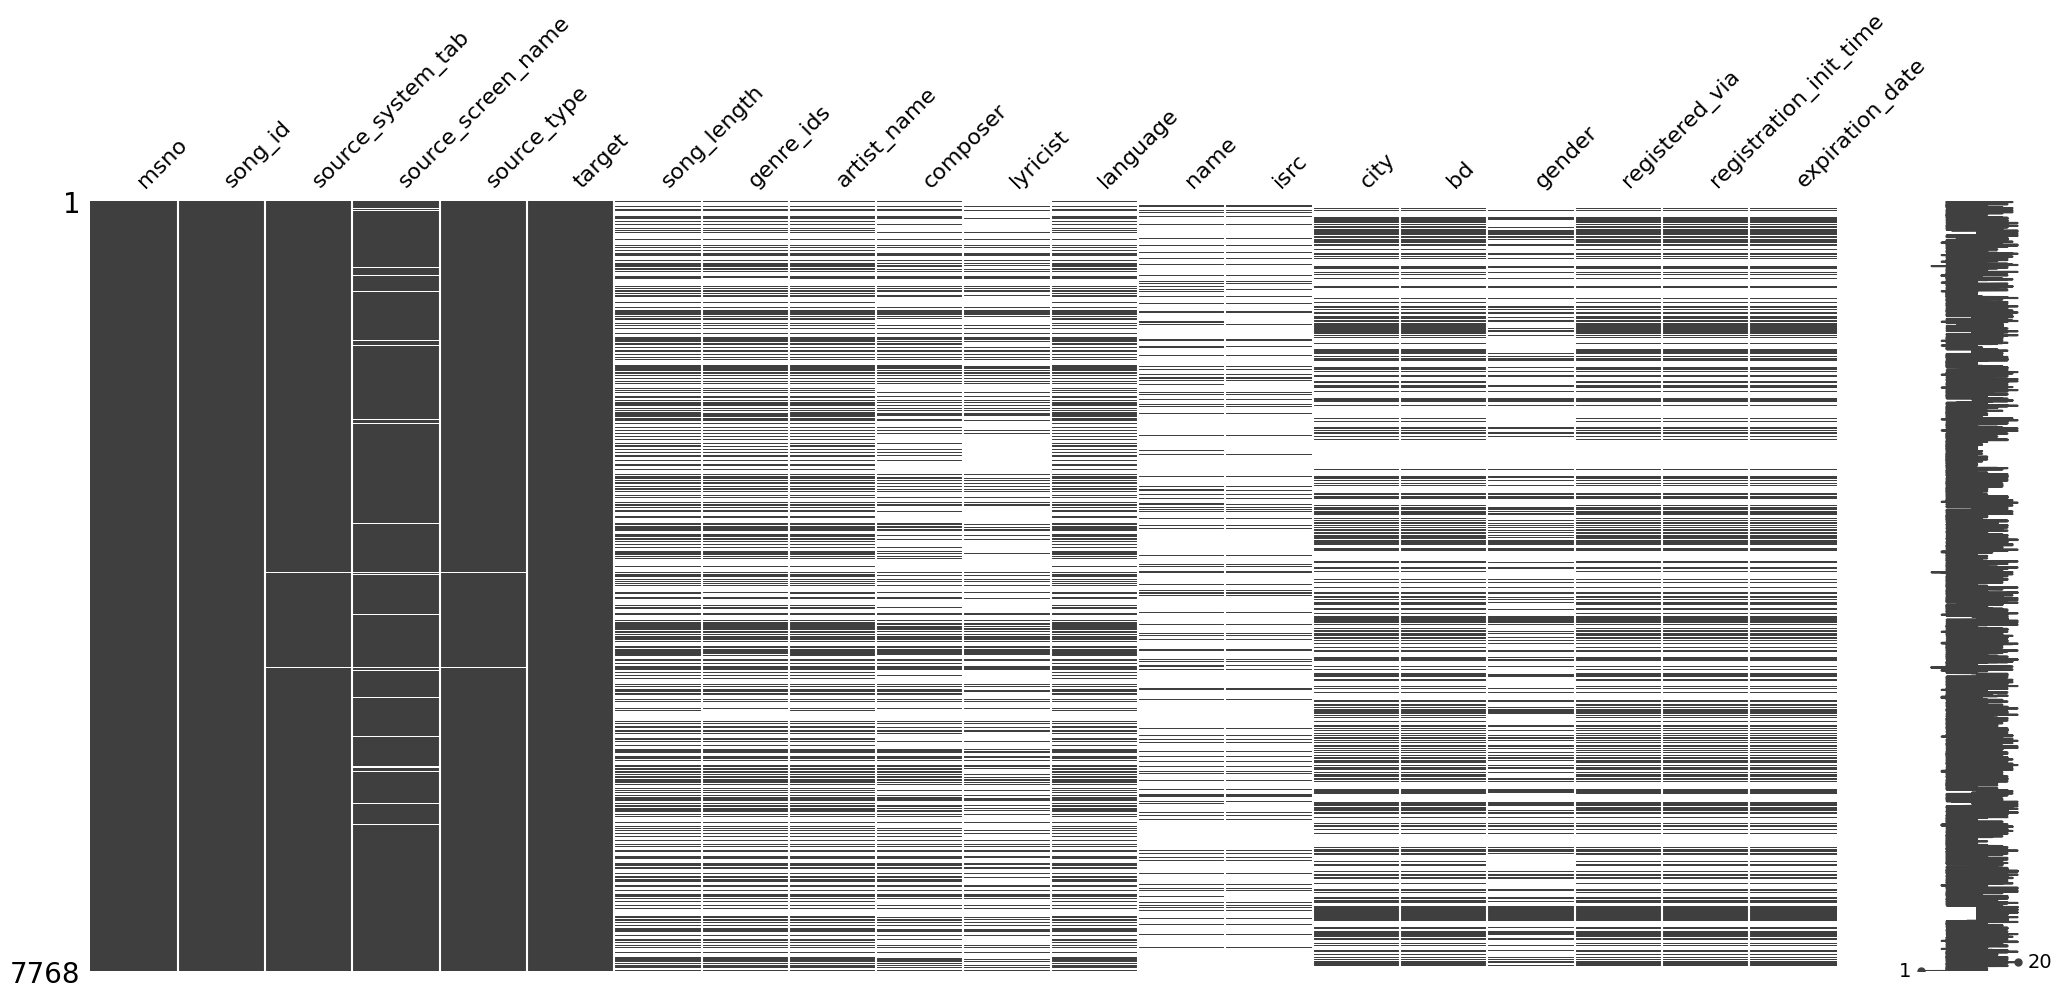

In [ ]:
msno.matrix(songs)

In [ ]:
for i in songs.select_dtypes(include=['object']).columns:
    songs[i][songs[i].isnull()] = 'unknown'
songs.fillna(value = 0).tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
7763,7H8Teyq/bk0vHVwbjT2+Otaz8vHTgdJHmfxwYm2P/K8=,FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,my library,Local playlist more,local-playlist,1.0,0.0,unknown,unknown,unknown,unknown,0.0,unknown,unknown,0.0,0.0,unknown,0.0,0.0,0.0
7764,7H8Teyq/bk0vHVwbjT2+Otaz8vHTgdJHmfxwYm2P/K8=,TLU46LbiJ+1mmJr4Le4Z5eaUQq3TiXgdZpE5EtR4WZI=,my library,Local playlist more,local-playlist,1.0,266866.0,465,Maroon 5,unknown,unknown,52.0,unknown,unknown,0.0,0.0,unknown,0.0,0.0,0.0
7765,7H8Teyq/bk0vHVwbjT2+Otaz8vHTgdJHmfxwYm2P/K8=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-playlist,1.0,219324.0,458,周湯豪 (NICKTHEREAL),周湯豪,周湯豪\崔惟楷,3.0,unknown,unknown,0.0,0.0,unknown,0.0,0.0,0.0
7766,7H8Teyq/bk0vHVwbjT2+Otaz8vHTgdJHmfxwYm2P/K8=,Z+mhovcYbExPp66GnBecKttDRM5S5YCAw9vzJACsQAU=,my library,Local playlist more,local-playlist,1.0,0.0,unknown,unknown,unknown,unknown,0.0,再會中港路,unknown,0.0,0.0,unknown,0.0,0.0,0.0
7767,7H8Teyq/bk0,unknown,unknown,unknown,unknown,0.0,0.0,unknown,unknown,unknown,unknown,0.0,unknown,unknown,0.0,0.0,unknown,0.0,0.0,0.0


<Axes: >

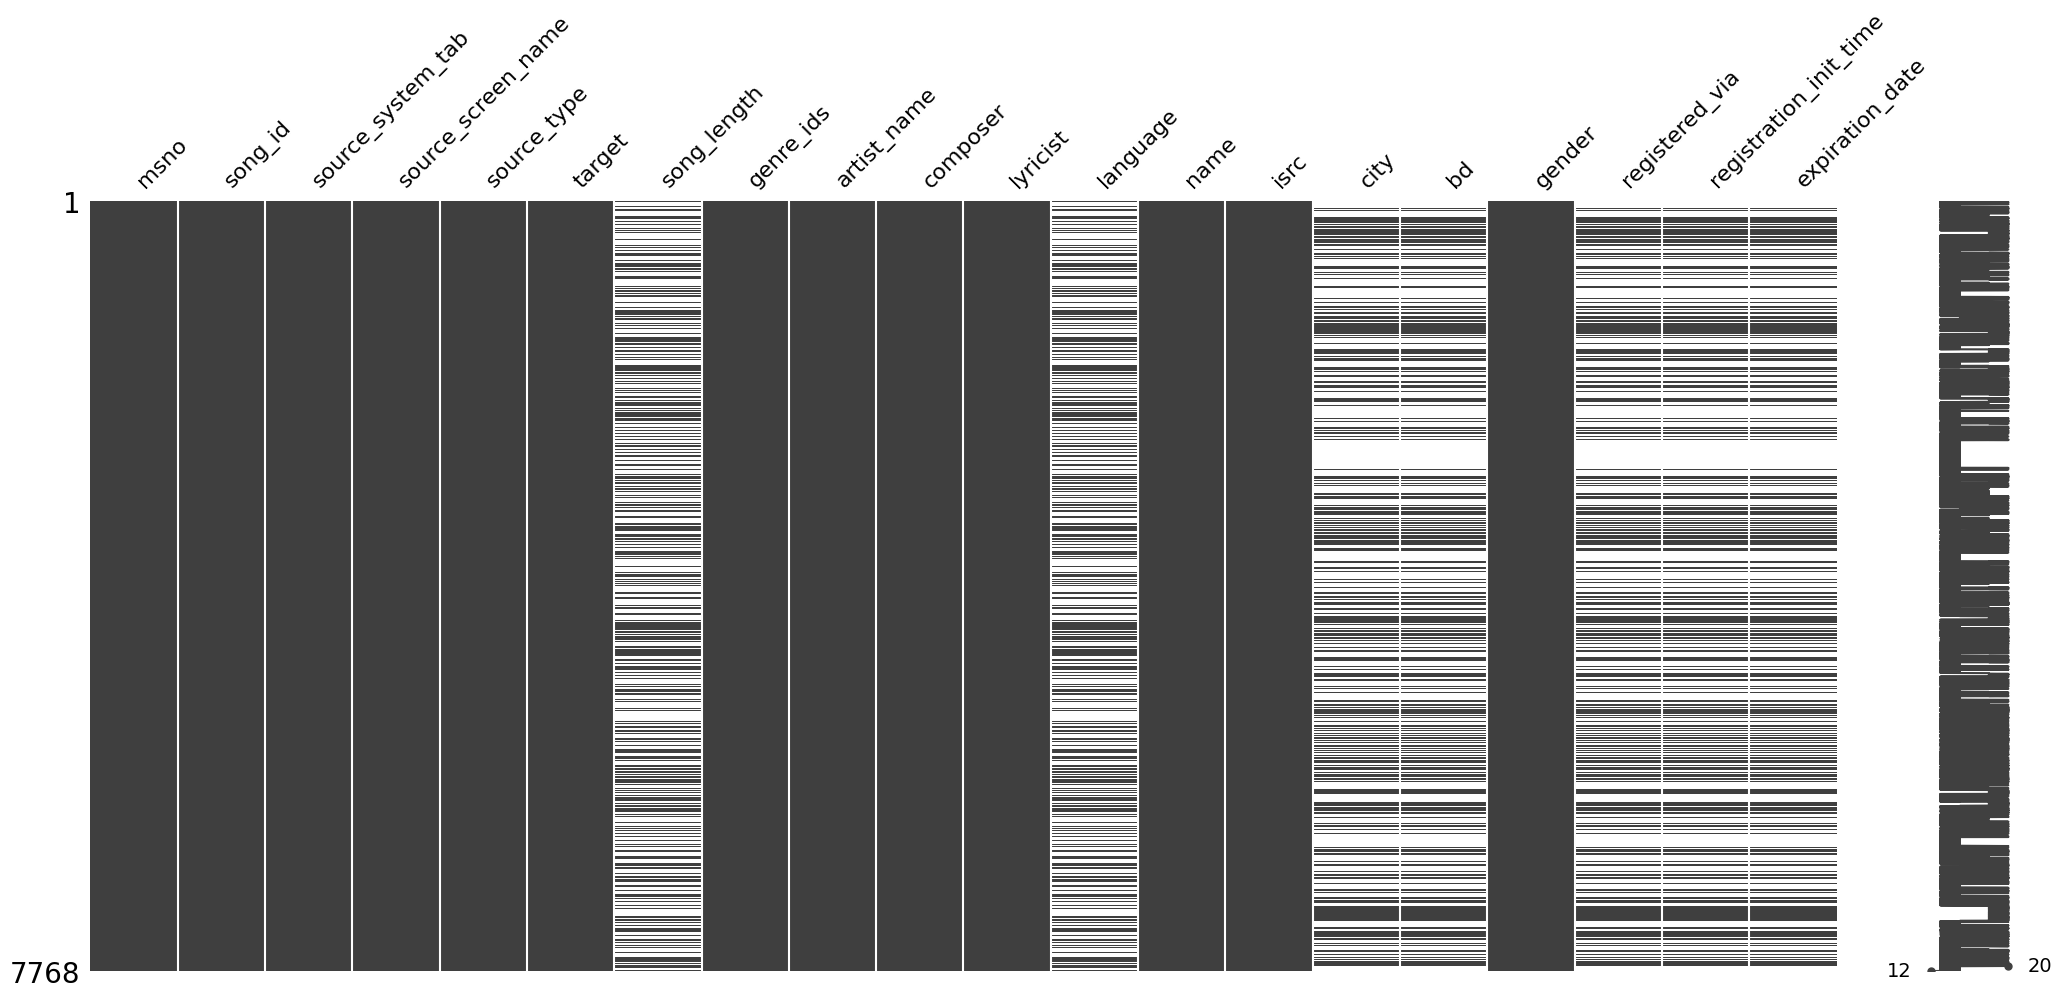

In [ ]:
msno.matrix(songs)

# **Extracting new Features**

In [ ]:
# registration_init_time
songs.registration_init_time = pd.to_datetime(songs.registration_init_time, format='%Y%m%d', errors='ignore')
songs['registration_init_time_year'] = songs['registration_init_time'].dt.year
songs['registration_init_time_month'] = songs['registration_init_time'].dt.month
songs['registration_init_time_day'] = songs['registration_init_time'].dt.day

# expiration_date
songs.expiration_date = pd.to_datetime(songs.expiration_date,  format='%Y%m%d', errors='ignore')
songs['expiration_date_year'] = songs['expiration_date'].dt.year
songs['expiration_date_month'] = songs['expiration_date'].dt.month
songs['expiration_date_day'] = songs['expiration_date'].dt.day

In [ ]:
songs.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,NaN,unknown,unknown,unknown,unknown,NaN,unknown,unknown,NaN,NaN,unknown,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,NaN,unknown,unknown,unknown,unknown,NaN,unknown,unknown,NaN,NaN,unknown,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,NaN,unknown,unknown,unknown,unknown,NaN,unknown,unknown,NaN,NaN,unknown,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,NaN,unknown,unknown,unknown,unknown,NaN,unknown,unknown,NaN,NaN,unknown,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,NaN,unknown,unknown,unknown,unknown,NaN,Sleep Without You,QM3E21606003,NaN,NaN,unknown,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
label_encoder = LabelEncoder()
one_hot = OneHotEncoder()

for i in songs.columns :
    songs[i] = label_encoder.fit_transform(songs[i])

In [ ]:
songs.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,374,998,1,6,5,1,1580,59,440,657,312,8,348,773,18,42,2,5,516,202,13,12,31,4,12,31
1,765,2936,3,7,4,1,1580,59,440,657,312,8,348,773,18,42,2,5,516,202,13,12,31,4,12,31
2,765,1593,3,7,4,1,1580,59,440,657,312,8,348,773,18,42,2,5,516,202,13,12,31,4,12,31
3,765,326,3,7,4,1,1580,59,440,657,312,8,348,773,18,42,2,5,516,202,13,12,31,4,12,31
4,374,481,1,6,5,1,1580,59,440,657,312,8,254,221,18,42,2,5,516,202,13,12,31,4,12,31


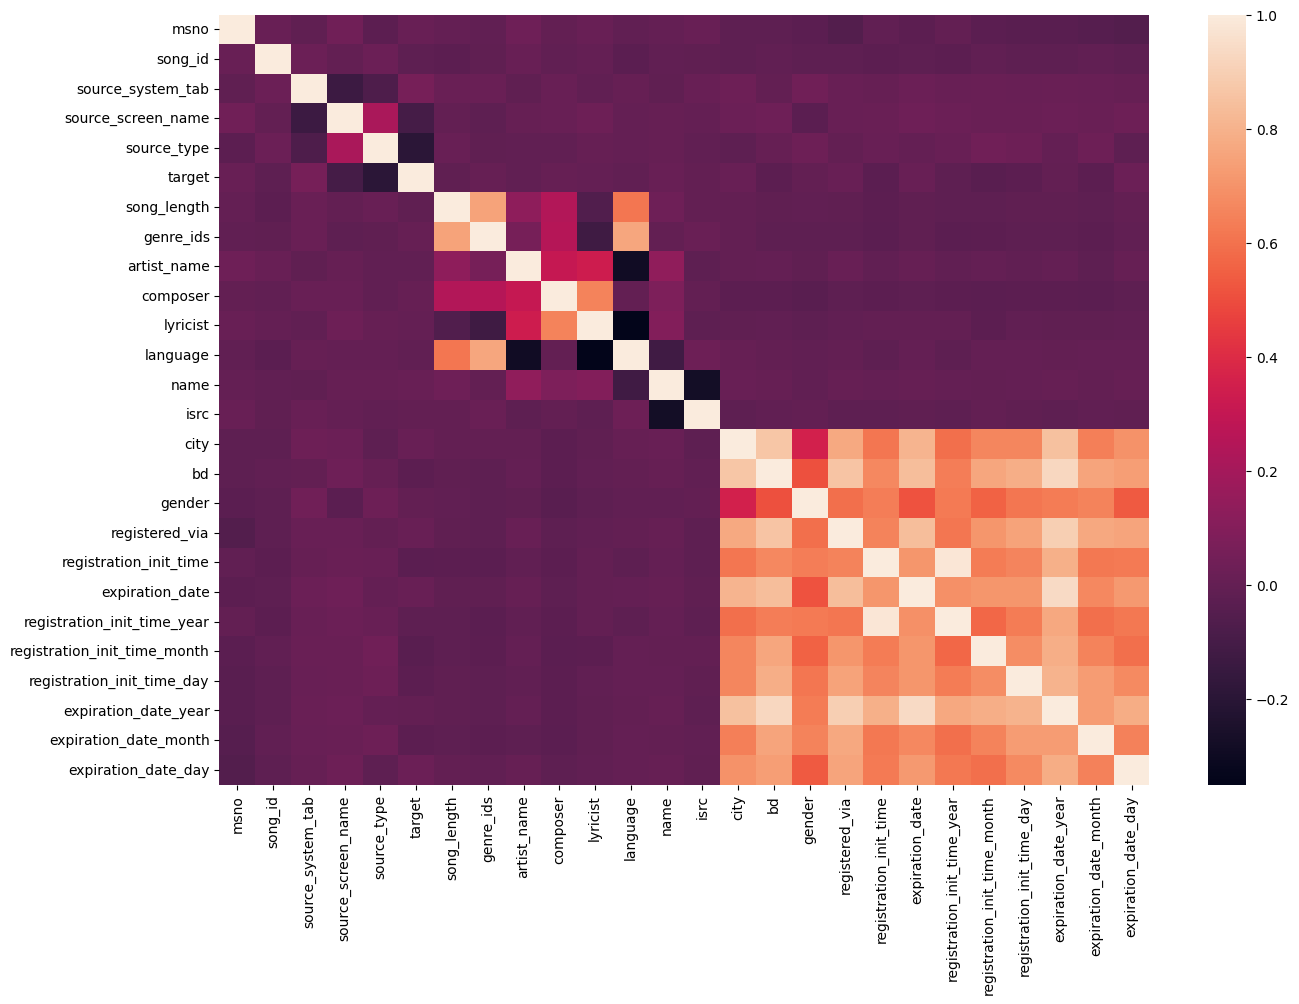

In [ ]:
# Сorrelation matrix
plt.figure(figsize=[15,10])
sns.heatmap(songs.corr()) #annot = True
plt.show()

# **Modeling**

In [ ]:
songs.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'name', 'isrc', 'city', 'bd',
       'gender', 'registered_via', 'registration_init_time', 'expiration_date',
       'registration_init_time_year', 'registration_init_time_month',
       'registration_init_time_day', 'expiration_date_year',
       'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [ ]:
X = songs.drop('target', axis = 1)
y = songs['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
val_pred = np.zeros(y_val.shape)

In [ ]:
val_pred = np.zeros(y_val.shape).reshape(-1, 1)

In [ ]:
# Using a classification model that outputs probabilities
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
val_pred = model.predict_proba(X_val)

# Normalizing the val_pred values to sum to 1
val_pred = val_pred / np.sum(val_pred, axis=1)[:, np.newaxis]

In [ ]:
# Reshaping the val_pred variable to have the correct shape
val_pred = val_pred.reshape(-1, 1)

In [ ]:
def model_with(model_name, X_train, X_val, y_train, y_val) :
    print("==================================================")
    print("Modeling with :", model_name)
    print()

    if model_name == "Random Forest Classifier" :
        model = RandomForestClassifier(
            n_estimators=1000,
        )
    elif model_name == "Extra Trees Classifier" :
        model = ExtraTreesClassifier(
            n_estimators=1000,
        )
    elif model_name == "LightGBM Classifier" :
        model = lgbm.LGBMClassifier(
            n_estimators=1000,
        )
    elif model_name == "XGBoost Classifier" :
        model = xgb.XGBClassifier(
            n_estimators=1000,
        )
    elif model_name == "CatBoost Classifier" :
        model = cb.CatBoostClassifier(
            n_estimators=1000,
            verbose=0
        )
    else :
        print("Model not found in function.")

    model.fit(X_train, y_train)

    val_pred = model.predict(X_val)
    print(classification_report(y_val, val_pred))
    print()
    print("Accuracy :", accuracy_score(y_val, val_pred))


    print("==================================================")
    print()

In [ ]:
models = ["Random Forest Classifier","Extra Trees Classifier","LightGBM Classifier", "XGBoost Classifier", "CatBoost Classifier"]
for i in models :
    model_with(i, X_train, X_val, y_train, y_val)

Modeling with : Random Forest Classifier

              precision    recall  f1-score   support

           0       0.66      0.50      0.57       435
           1       0.86      0.93      0.89      1506
           2       0.00      0.00      0.00         1

    accuracy                           0.83      1942
   macro avg       0.51      0.47      0.49      1942
weighted avg       0.82      0.83      0.82      1942


Accuracy : 0.8305870236869207


ValueError: multi_class must be in ('ovo', 'ovr')

# **Random Forest with Class weights**

In [ ]:
rf = RandomForestClassifier(
        n_estimators = 1000,
        class_weight={0: 1.0050505050505052, 1: 0.9949494949494948}
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.0050505050505052,
                                     1: 0.9949494949494948},
                       n_estimators=1000)

In [ ]:
val_pred = rf.predict(X_val)
print("Accuracy :", accuracy_score(y_val, val_pred))

Accuracy : 0.8316168898043255


In [ ]:
# without classweights
rf = RandomForestClassifier(
        n_estimators = 1000
)
rf.fit(X_train, y_train)
val_pred = rf.predict(X_val)
print("Accuracy :", accuracy_score(y_val, val_pred))

Accuracy : 0.8305870236869207
